In [13]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
dp = pd.read_excel("M3_ALF_Data.xlsx")
dp.head(10)

Age  Gender  Weight  Height  Body Mass Index  Obesity  Waist  Education  \
0   65       1    56.0   162.1            21.31      0.0   83.6        0.0   
1   36       1    60.2   162.2            22.88      0.0   76.6        0.0   
2   66       1    83.9   162.5            31.77      1.0  113.2        0.0   
3   54       1    69.4   160.5            26.94      0.0   77.9        1.0   
4   63       1    73.1   159.2            28.84      0.0   89.3        0.0   
5   26       0   119.3   193.2            31.96      1.0  117.9        1.0   
6   66       0    85.1   172.1            28.73      0.0   99.2        1.0   
7   59       1    69.9   160.9            27.00      0.0  101.5        1.0   
8   53       1    75.2   174.1            24.81      0.0   85.6        1.0   
9   78       1    47.6   155.3            19.74      0.0   70.3        0.0   

   Unmarried  Income  Alcohol Consumption  Diabetes  
0        0.0     1.0                    1       0.0  
1        NaN     1.0                    0       0.0  
2        1.0     0.0                    1       1.0  
3        0.0     0.0                    1       0.0  
4        0.0     NaN                    0       0.0  
5        0.0     0.0                    0       0.0  
6        0.0     0.0                    0       0.0  
7        1.0     0.0                    0       1.0  
8        0.0     1.0                    1       0.0  
9        1.0     0.0                    0       1.0

In [15]:
def check_categorical_cols(dataframe,count):
    cat_list = []
    cont_list = []
    for i in dataframe.columns:
        if len(dataframe[i].value_counts())>count:
            cont_list.append(i)
            
        else:
            cat_list.append(i)
            
    print(cont_list)
    print('\n')
    print(cat_list)
    
check_categorical_cols(dp,2)

['Age', 'Weight', 'Height', 'Body Mass Index', 'Waist']


['Gender', 'Obesity', 'Education', 'Unmarried', 'Income', 'Alcohol Consumption', 'Diabetes']


In [16]:
dp["Gender"].value_counts()

1    4630
0    4155
Name: Gender, dtype: int64

In [17]:
dp.isna().sum()

Age                       0
Gender                    0
Weight                  194
Height                  191
Body Mass Index         290
Obesity                 290
Waist                   314
Education                20
Unmarried               452
Income                 1161
Alcohol Consumption       0
Diabetes                  2
dtype: int64

In [18]:
dp.info()
# there are no object data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  8785 non-null   int64  
 1   Gender               8785 non-null   int64  
 2   Weight               8591 non-null   float64
 3   Height               8594 non-null   float64
 4   Body Mass Index      8495 non-null   float64
 5   Obesity              8495 non-null   float64
 6   Waist                8471 non-null   float64
 7   Education            8765 non-null   float64
 8   Unmarried            8333 non-null   float64
 9   Income               7624 non-null   float64
 10  Alcohol Consumption  8785 non-null   int64  
 11  Diabetes             8783 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 823.7 KB


<AxesSubplot:>

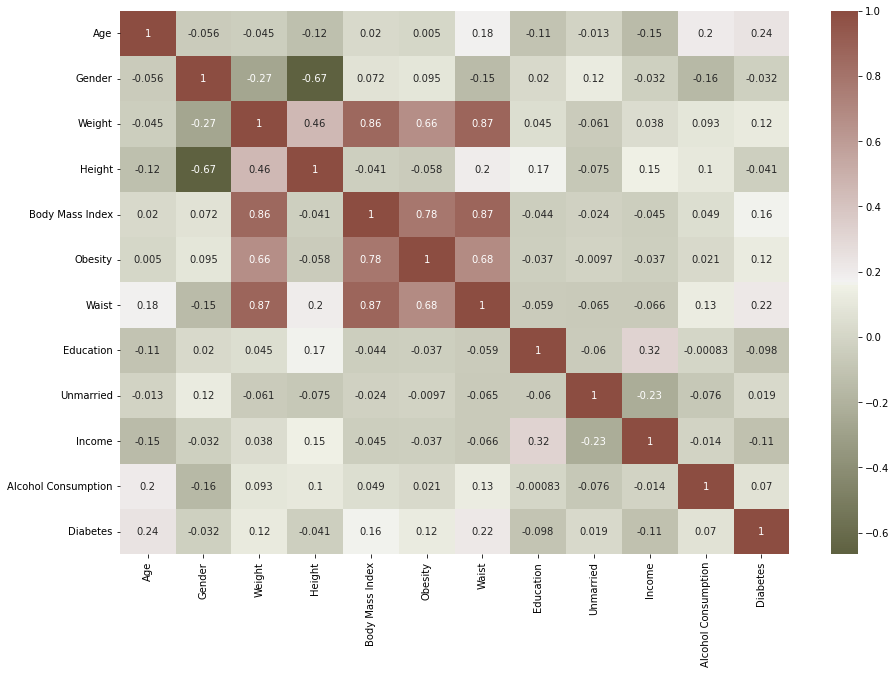

In [19]:
cmap = sns.diverging_palette(90,20,s=50, l=40, n=6,as_cmap=True)
corrmat= dp.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [20]:
dp1 = dp.copy()

In [21]:
dp1.duplicated().sum()

6

In [22]:
dp1.drop_duplicates(inplace=True)
# removed duplicated values

In [23]:
# Waist                8471 non-null   float64
# Education            8765 non-null   float64
# Unmarried            8333 non-null   float64

## Handle Missing Values 

In [24]:
dp1.shape

(8779, 12)

In [25]:
dp1.dropna(axis=0,inplace=True)

In [26]:
dp1.shape

(6880, 12)

In [27]:
dp1.isnull().sum()

Age                    0
Gender                 0
Weight                 0
Height                 0
Body Mass Index        0
Obesity                0
Waist                  0
Education              0
Unmarried              0
Income                 0
Alcohol Consumption    0
Diabetes               0
dtype: int64

In [28]:
dp.shape

(8785, 12)

In [29]:
dp.dropna()

Age  Gender  Weight  Height  Body Mass Index  Obesity  Waist  Education  \
0      65       1    56.0   162.1            21.31      0.0   83.6        0.0   
2      66       1    83.9   162.5            31.77      1.0  113.2        0.0   
3      54       1    69.4   160.5            26.94      0.0   77.9        1.0   
5      26       0   119.3   193.2            31.96      1.0  117.9        1.0   
6      66       0    85.1   172.1            28.73      0.0   99.2        1.0   
...   ...     ...     ...     ...              ...      ...    ...        ...   
8779   29       0    99.5   177.3            31.65      1.0  112.7        0.0   
8781   66       0   102.0   180.7            31.24      1.0  113.2        0.0   
8782   37       0    84.4   186.0            24.40      0.0   93.6        0.0   
8783   39       0    92.1   184.8            26.97      0.0   98.2        1.0   
8784   70       1    58.5   161.1            22.54      0.0   99.4        0.0   

      Unmarried  Income  Alcohol Consumption  Diabetes  
0           0.0     1.0                    1       0.0  
2           1.0     0.0                    1       1.0  
3           0.0     0.0                    1       0.0  
5           0.0     0.0                    0       0.0  
6           0.0     0.0                    0       0.0  
...         ...     ...                  ...       ...  
8779        1.0     1.0                    0       0.0  
8781        0.0     1.0                    0       0.0  
8782        0.0     0.0                    0       0.0  
8783        0.0     1.0                    0       0.0  
8784        0.0     0.0                    0       0.0  

[6880 rows x 12 columns]

In [30]:
dp.shape

(8785, 12)

In [31]:
dp2 = dp.copy()

In [32]:
dp2.shape

(8785, 12)

In [36]:
percent_missing = dp2.isnull().sum() * 100 / len(dp2)
missing_value_df = pd.DataFrame({'column_name': dp2.columns,
                                 'percent_missing': percent_missing})

In [37]:
missing_value_df

column_name  percent_missing
Age                                  Age         0.000000
Gender                            Gender         0.000000
Weight                            Weight         2.208310
Height                            Height         2.174161
Body Mass Index          Body Mass Index         3.301081
Obesity                          Obesity         3.301081
Waist                              Waist         3.574274
Education                      Education         0.227661
Unmarried                      Unmarried         5.145134
Income                            Income        13.215709
Alcohol Consumption  Alcohol Consumption         0.000000
Diabetes                        Diabetes         0.022766

## SimpleImputer

In [33]:
dp2['Education'].dtypes

dtype('float64')

In [34]:
dp2['Education'].value_counts()

0.0    4982
1.0    3783
Name: Education, dtype: int64

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [42]:
X = dp2.loc[:,['Waist','Education','Unmarried']]
y = dp2['Diabetes']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [45]:
imputer = SimpleImputer(strategy='most_frequent')

X_train = imputer.fit_transform(X_train)

In [46]:
imputer.statistics_

array([97.,  0.,  0.])

In [47]:
dp2['Waist'].fillna(97,inplace=True)

In [48]:
dp2['Education'].fillna(0,inplace=True)

In [49]:
dp2['Unmarried'].fillna(0,inplace=True)

In [50]:
dp2.isnull().sum()

Age                       0
Gender                    0
Weight                  194
Height                  191
Body Mass Index         290
Obesity                 290
Waist                     0
Education                 0
Unmarried                 0
Income                 1161
Alcohol Consumption       0
Diabetes                  2
dtype: int64

In [52]:
for i in dp2.columns:
    print(dp2[i].value_counts())

85    249
21    177
22    176
40    174
20    173
     ... 
58     77
78     74
84     66
79     62
83     53
Name: Age, Length: 66, dtype: int64
1    4630
0    4155
Name: Gender, dtype: int64
62.80     31
72.60     28
69.40     28
66.70     27
68.70     27
          ..
138.30     1
84.44      1
63.44      1
57.14      1
80.04      1
Name: Weight, Length: 1120, dtype: int64
162.8    43
166.2    41
163.5    40
163.6    40
168.3    39
         ..
194.5     1
189.3     1
142.2     1
199.4     1
141.8     1
Name: Height, Length: 553, dtype: int64
26.51    16
24.85    15
27.55    15
29.36    13
29.72    13
         ..
40.89     1
35.73     1
42.41     1
39.49     1
30.48     1
Name: Body Mass Index, Length: 2400, dtype: int64
0.0    5811
1.0    2684
Name: Obesity, dtype: int64
97.0     365
98.0      52
96.0      40
91.0      38
92.0      37
        ... 
63.0       1
161.0      1
142.8      1
60.4       1
142.7      1
Name: Waist, Length: 800, dtype: int64
0.0    5002
1.0    3783
Name: Educa